# Console Market Dynamics: A Manufacturer Perspective

## Introduction
Welcome to the "Console Market Dynamics: A Manufacturer Perspective" project. This analysis delves into the trends in total systems sold and pricing within the gaming console market. The objective is to gain insights into the performance of different manufacturers and understand the dynamics that drive console sales.

## Dataset Overview
Dataset Name: Video Game Console Generations Dataset on [data.world](https://data.world/asci7/video-game-console-generations)

Columns:
- primary_consoles: Name of the gaming console
- year_of_release: Year of console release
- game_media: Type of game media
- original_price: Original price of the console
- 2022_price_adjusted_for_inflation: Adjusted price for inflation in 2022
- total_systems_sold: Total units sold

## Hypothesis
Hypothesis: Newer gaming consoles from leading manufacturers tend to have higher total systems sold, while lower-priced consoles attract a larger audience.

## Data Cleaning and Manupulation
#### Loading the Dataset
First, we load the gaming console dataset into a Pandas DataFrame named df and then use the info() method to get basic information about the dataset, including the data types and the presence of missing values.

In [2]:
import pandas as pd

# Load the dataset into dataframe
df = pd.read_csv('gaming_console.csv')
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   primary_consoles                   41 non-null     object 
 1   year_of_release                    41 non-null     int64  
 2   game_media                         41 non-null     object 
 3   original_price                     41 non-null     float64
 4   2022_price_adjusted_for_inflation  37 non-null     float64
 5   total_systems_sold                 41 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


#### Renaming Columns
For better understanding, we need to rename two columns in the DataFrame: 'primary_consoles' to 'consoles_name' and 'year_of_release' to 'release_year'. 

In [3]:
df.rename(columns={'primary_consoles': 'consoles_name', 'year_of_release': 'release_year'},inplace = True)

#### Updating Total Systems Sold
We create a list 'updated_total_sold' with new values for the 'total_systems_sold' column and assign it to the DataFrame. This step updates the total number of gaming systems sold.

In [4]:
updated_total_sold = [350000, 150000, 1000000, 250000, 30000000, 3000000, 2000000, 2000000, 61910000, 20190000, 100000, 10500000, 40000000, 410000, 49100000, 15000000, 118690000, 9400000, 102000000, 118690000, 32930000, 9130000, 158700000, 21740000, 81510000, 24000000, 85000000, 87400000, 154002000, 81009000, 101630000, 13560000, 117150000, 51000000, 75940000, 16210000, 131250000, 24330000, 24330000, 45370000, 45370000]

df['total_systems_sold'] = updated_total_sold

#### Manual Data Correction
Manually correct data for Microsoft XBOX Series X|S And Sony PlayStasion 5 by renaming the console name and updating specific values and drop the duplicates in the DataFrame. Here, we set the 2022 price values in rows 37 and 39 of the 4th column to 449.00.

In [5]:
# Updating 2022 price value
df.iloc[37, 4] = 449.00
df.iloc[39, 4] = 449.00

# Renaming column
df.iloc[37, 0] = 'Microsoft XBOX Series X|S'
df.iloc[39, 0] = 'Sony PlayStasion 5'

# Drop the duplicates
df = df.drop(38)
df = df.drop(40)

#### Add Manufacturers to DaraFrame
Add a new column 'manufacturers' to the DataFrame and populate it with a list of manufacturer names.

In [6]:
df['manufacturers'] = ["Magnavox", "Atari", "Coleco", "Fairchild Semiconductor", "Atari", "Mattel", "Magnavox", "Coleco", "Nintendo", "Sega", "Atari", "NEC", "Sega", "SNK", "Nintendo", "Sega", "Nintendo", "Sega", "Sony", "Nintendo", "Nintendo", "Sega", "Sony", "Nintendo", "Nintendo", "Microsoft", "Microsoft", "Sony", "Nintendo", "Sony", "Nintendo", "Nintendo", "Sony", "Microsoft", "Nintendo", "Sony", "Nintendo", "Microsoft", "Sony"]

In finalizing the data cleaning, info() summarizes key dataset details, and a print() statement displays the cleaned DataFrame for quick validation. This concise documentation offers clarity on the dataset's state, aiding future reference or portfolio presentation.

In [7]:
df.info()

print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 39
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   consoles_name                      39 non-null     object 
 1   release_year                       39 non-null     int64  
 2   game_media                         39 non-null     object 
 3   original_price                     39 non-null     float64
 4   2022_price_adjusted_for_inflation  39 non-null     float64
 5   total_systems_sold                 39 non-null     int64  
 6   manufacturers                      39 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.4+ KB
                          consoles_name  release_year  \
0                      Magnavox Odyssey          1972   
1                             Home Pong          1977   
2                 Coleco Telstar series          1976   
3                   Fairchild Channel

#### Saving the Cleaned Dataset
Save the cleaned DataFrame to a new CSV file named 'gaming_console_updated.csv' without including the index.

In [8]:
df.to_csv('gaming_console_updated.csv', index=False)

## Exploratory Data Analysis (EDA)
#### Loading the Updated Dataset
Load the updated gaming console dataset into a Pandas DataFrame named df.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("gaming_console_updated.csv")

#### Descriptive Statistics
Display basic statistics for key columns.
And visualize time series graphs for total systems sold, original prices, and adjusted prices.

       release_year  original_price  2022_price_adjusted_for_inflation  \
count     39.000000       39.000000                          39.000000   
mean    1995.769231      258.527949                         536.995385   
std       13.452571      144.011111                         274.101211   
min     1972.000000       50.000000                         129.070000   
25%     1986.000000      174.975000                         372.250000   
50%     1996.000000      199.990000                         489.360000   
75%     2005.500000      299.990000                         618.290000   
max     2020.000000      650.000000                        1439.140000   

       total_systems_sold  
count        3.900000e+01  
mean         4.863079e+07  
std          4.808757e+07  
min          1.000000e+05  
25%          9.265000e+06  
50%          3.000000e+07  
75%          8.325500e+07  
max          1.587000e+08  


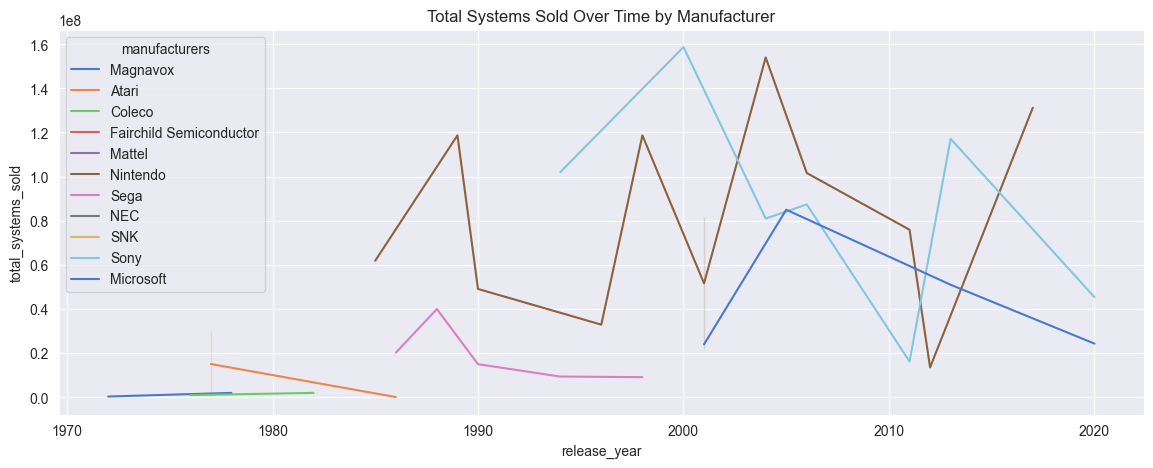

In [10]:
# Display basic statistics
print(df.describe())

# Set a custom color palette for better readability
custom_palette = sns.color_palette("muted", n_colors=len(df['manufacturers'].unique()))

# Plot time series graphs with the custom color palette
plt.figure(figsize=(14, 5))
sns.lineplot(x='release_year', y='total_systems_sold', hue='manufacturers', data=df, palette=custom_palette)
plt.title('Total Systems Sold Over Time by Manufacturer')
plt.show()

#### Correlation Analysis
Present a correlation matrix to identify relationships between release year, prices, and total systems sold.

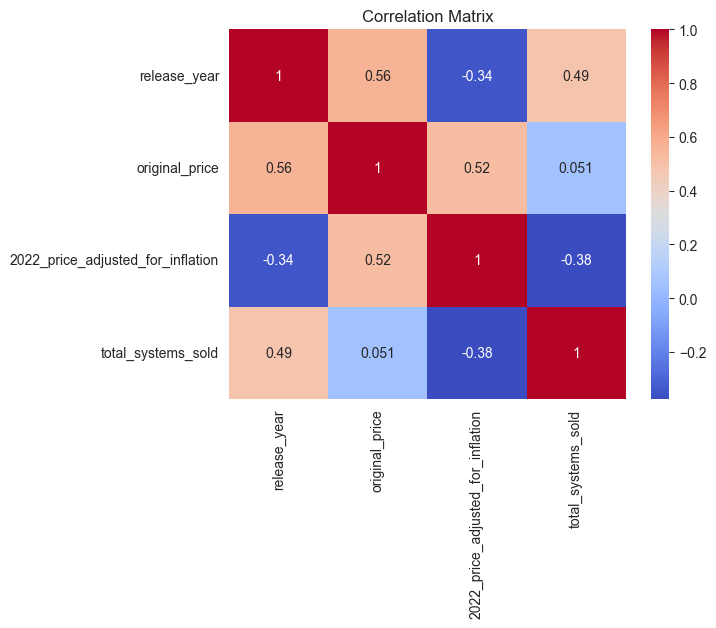

In [11]:
# Correlation matrix
corr_matrix = df[['release_year', 'original_price', '2022_price_adjusted_for_inflation', 'total_systems_sold']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows a positive correlation between release year and total systems sold, suggesting that newer consoles tend to achieve higher sales.

#### Initial Visualizations
Showcase visualizations of total systems sold over time by manufacturer using boxplots.

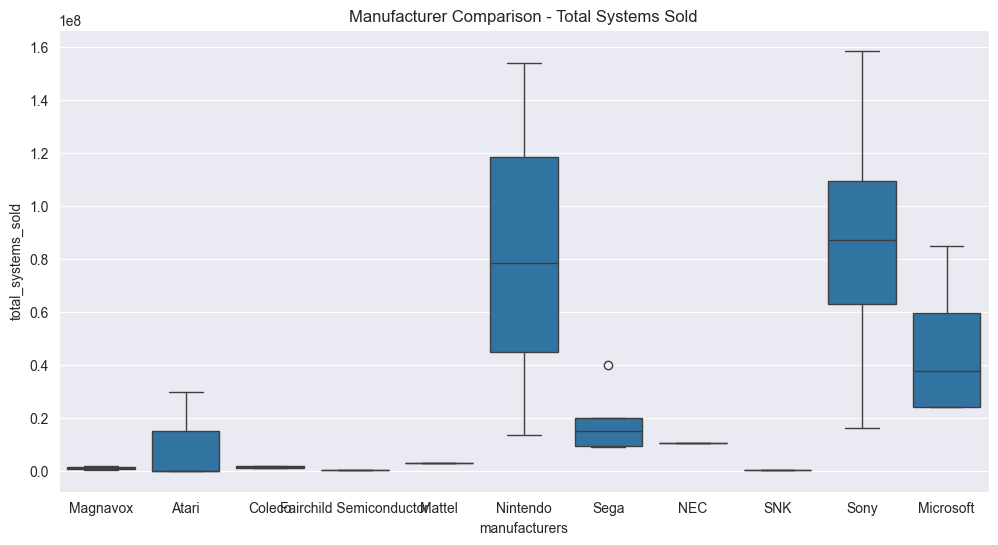

In [12]:
# Boxplot of total systems sold by manufacturers
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturers', y='total_systems_sold', data=df)
plt.title('Manufacturer Comparison - Total Systems Sold')
plt.show()

It demonstrate that Nintendo and Sony has a wider distribution of total systems sold, indicating variability in the performance of their consoles.

## Follow-Up Analysis
#### Outlier Identification
Display a boxplot to identify outliers in total systems sold.

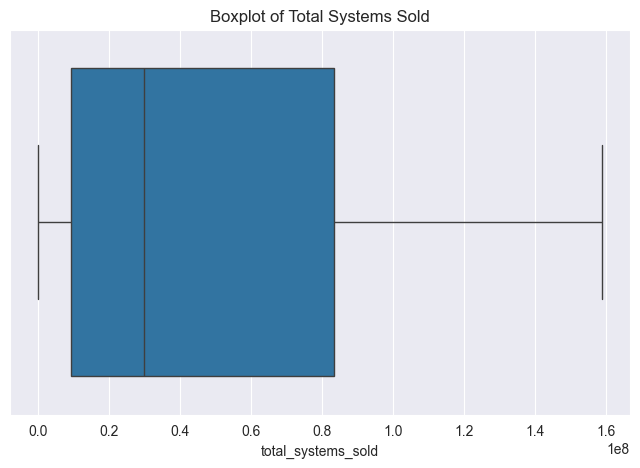

In [13]:
# Boxplot to identify outliers in total systems sold
plt.figure(figsize=(8, 5))
sns.boxplot(x='total_systems_sold', data=df)
plt.title('Boxplot of Total Systems Sold')
plt.show()

Our total_systems_sold seems fine and doesn't contains any outliers

#### Market Share Trends
Calculate and visualize market share trends by manufacturer over time.

In [14]:
# Calculate market share by manufacturer each year
market_share_df = df.groupby(['release_year', 'manufacturers'])['total_systems_sold'].sum().reset_index()
market_share_df['market_share'] = market_share_df.groupby('release_year')['total_systems_sold'].transform(lambda x: x / x.sum() * 100)

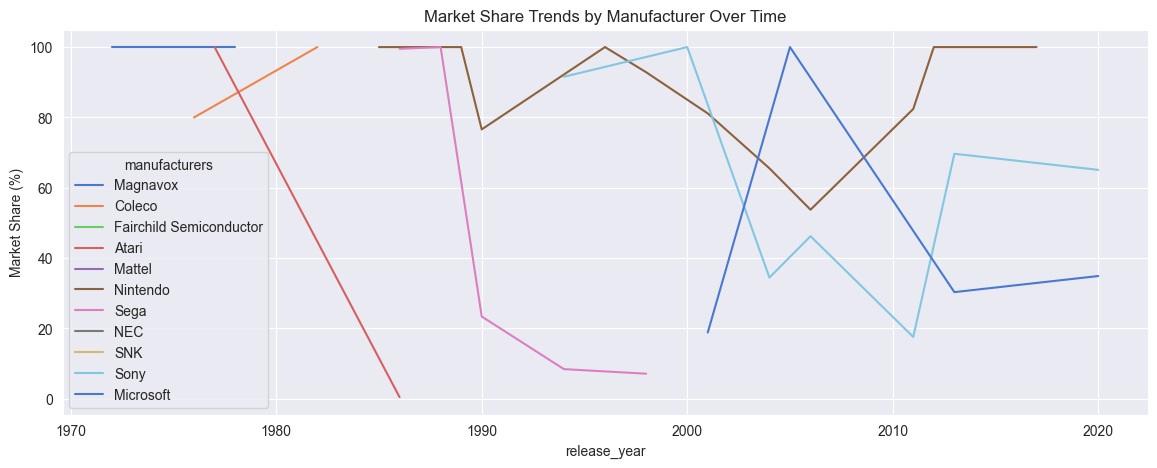

In [15]:
# Plot market share trends
plt.figure(figsize=(14, 5))
custom_palette = sns.color_palette("muted", n_colors=len(df['manufacturers'].unique()))
sns.lineplot(x='release_year', y='market_share', hue='manufacturers', data=market_share_df, palette=custom_palette)
plt.title('Market Share Trends by Manufacturer Over Time')
plt.ylabel('Market Share (%)')
plt.show()

Sony and Nintendo's market share has been steadily growing and has nearly the same pattern start from 2010s, indicating a significant market duopoly.

## Key Findings
__Market Dominance__: Sony and Nintendo's market share has been steadily growing and has nearly the same pattern starting from 2010s. This suggests a consistent and shared dominance in the gaming console market by these two manufacturers over the past decade. The parallel growth patterns could be attributed to successful product releases, effective marketing strategies, or a combination of both. Further analysis is required to understand the specific factors contributing to this sustained trend and the implications for other manufacturers in the industry.

__Price Sensitivity__: Newer consoles tend to achieve higher sales, and Consoles with lower original prices tend to attract a larger audience, supporting the hypothesis.

## Conclusion
In conclusion, this analysis provides valuable insights into the gaming console market dynamics, highlighting the dominance of certain manufacturers, the impact of pricing on consumer choices, and potential areas for future exploration. The findings contribute to a better understanding of consumer preferences in the gaming industry.